In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"

tweets = pd.read_csv(url)

In [3]:
plot_size = plt.rcParams['figure.figsize']
print(plot_size[0])
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams['figure.figsize'] = plot_size

6.0
4.0


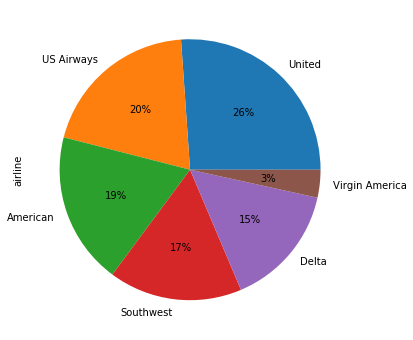

In [4]:
tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

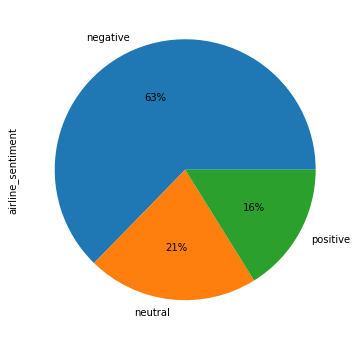

In [5]:
tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

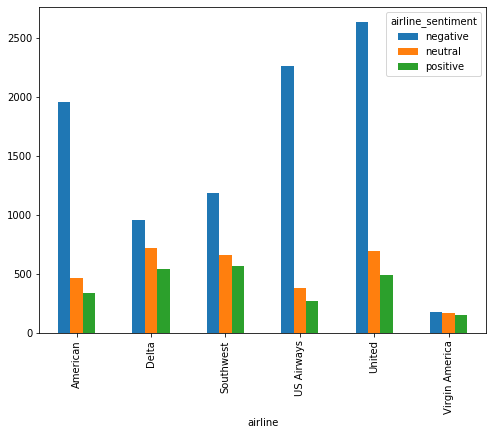

In [8]:
grouped = tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()

grouped.plot(kind='bar')

In [11]:
features = tweets.iloc[:, 10].values
labels = tweets.iloc[:, 1].values

In [13]:
processed_features = []

for sentence in range(0, len(features)):
    # remove special characters 
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    
    # remove all single characters
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    
    # remove single characters from start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    
    # substitute multiple spaces with single spaces
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    
    # removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    
    # lowercase
    processed_feature = processed_feature.lower()
    
    processed_features.append(processed_feature)

In [14]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000, min_df=7, max_df=0.8,
                            stop_words=stopwords.words('english'))

processed_features = vectorizer.fit_transform(processed_features).toarray()

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features,
                        labels, test_size=0.2, random_state=0)

In [17]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=500, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [18]:
predictions = text_classifier.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f'{confusion_matrix(y_test, predictions)}')
print(f'{classification_report(y_test, predictions)}')
print(f'{accuracy_score(y_test, predictions)}')

[[1726  102   42]
 [ 328  248   38]
 [ 132   60  252]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7602459016393442
